<center><h1> Markov Chains and Hidden Markov Models </h1></center>
<center> An application for text generation </center>

# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix

The file `bigramenglish.txt` is the transition matrix in english between 2 characters. The value in position (i,j) is the transition probability from i to j.

In [4]:
filename_A= 'bigramenglish.txt' 
bi_eng = np.loadtxt(filename_A)

In [5]:
bi_eng

array([[0.0000000e+00, 1.1268720e-01, 4.3608943e-02, 4.5454545e-02,
        3.2904451e-02, 2.2094495e-02, 4.1763341e-02, 1.5555790e-02,
        6.4437882e-02, 6.8920059e-02, 3.6384729e-03, 4.2185193e-03,
        2.3465514e-02, 3.9759544e-02, 2.2832736e-02, 7.0343809e-02,
        3.1058848e-02, 1.4237503e-03, 2.5680236e-02, 6.6916262e-02,
        1.6452225e-01, 1.0388104e-02, 7.0660198e-03, 7.0502004e-02,
        1.0546298e-04, 1.0599030e-02, 5.2731491e-05, 0.0000000e+00],
       [0.0000000e+00, 1.4701126e-05, 2.2933757e-02, 3.3959601e-02,
        3.8075917e-02, 1.4701126e-04, 6.1744730e-03, 2.4697892e-02,
        8.8206757e-04, 3.7046838e-02, 8.8206757e-04, 1.1907912e-02,
        8.1150216e-02, 3.5870748e-02, 2.2051689e-01, 1.4701126e-04,
        1.8082385e-02, 1.4701126e-05, 9.4822263e-02, 9.5410308e-02,
        1.3348623e-01, 1.1760901e-02, 3.3371556e-02, 9.8497545e-03,
        5.8804504e-04, 1.9846520e-02, 8.8206757e-04, 6.7478169e-02],
       [0.0000000e+00, 7.1874260e-02, 7.898270

In [6]:
dic={1 : ' ', 
     2 : 'a', 
     3 : 'b', 
     4: 'c', 
     5 : 'd', 
     6 : 'e', 
     7: 'f', 
     8 : 'g', 
     9 : 'h', 
     10: 'i', 
     11: 'j', 
     12 : 'k', 
     13 : 'l', 
     14: 'm', 
     15 : 'n', 
     16 : 'o', 
     17: 'p', 
     18 : 'q', 
     19 : 'r' , 
     20: 's', 
     21 : 't', 
     22 : 'u', 
     23: 'v', 
     24 : 'w', 
     25 : 'x' , 
     26: 'y', 
     27 : 'z', 
     28 : ' ' }

In [7]:
# Most common transitions
[dic[x+1] for x in np.argmax(bi_eng, axis=1)]

['t',
 'n',
 'e',
 'o',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'n',
 'o',
 ' ',
 'e',
 'e',
 ' ',
 'n',
 'e',
 'u',
 'e',
 ' ',
 'h',
 'r',
 'e',
 'a',
 't',
 ' ',
 'e',
 ' ']

# Word Generation

Starting from the initial state, we want to generate a word, i.e a series of characters that ends in the final state.

In [11]:
def next_state(dic, bi_gram, state) :
    
    # Starting from the state
    line = bi_gram[state-1]
    
    # Pick a random number
    x = np.random.random()
    
    # Find where the number falls
    thr = np.where(np.cumsum(line)>x)[0][0]+1
    
    return thr

In [12]:
next_state(dic, bi_eng, 1)

17

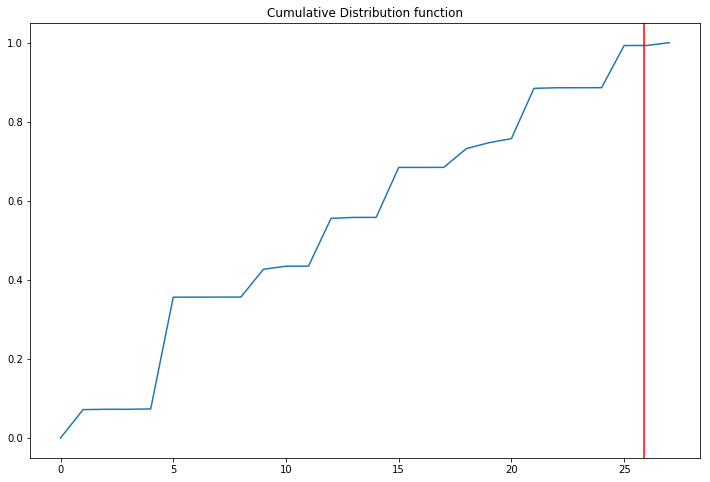

In [14]:
# Distribution function to understand which letter we pick
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(bi_eng[2]))
plt.title("Cumulative Distribution function")
plt.axvline(np.random.random()*28, c='red')
plt.show()

In [15]:
def generate_state_seq(dic, bi_gram) :
    state = 1
    seq = []
    while state != 28 :
        state = next_state(dic, bi_gram, state)
        seq.append(dic[state])
    return ''.join(seq)

In [16]:
for i in range(50) :
    print(generate_state_seq(dic, bi_eng))

lkin 
se 
isepolftacople 
hel 
owh 
irorssedengot 
o 
tiry 
hoste 
caters 
aswer 
west 
blely 
boreerseale 
d 
tensthuat 
ig 
mig 
phed 
d 
he 
parg 
se 
pursth 
ind 
te 
wh 
re 
alice 
duny 
hit 
ty 
pthe 
mavilie 
p 
t 
ng 
f 
th 
eathe 
mepely 
teved 
aly 
berarane 
hidut 
arerir 
it 
emathedsen 
t 
shiof 


Logically, the words do not mean anything. For most of them, they "look" like english words.

# Generate a sentence

In [18]:
# First, modify the transition matrix and the dictionary

def modify_mat_dic(bi_eng) :
    
    # Append new column
    new_col = (np.zeros(28)).T
    bi_eng = np.vstack( (bi_eng, new_col) )
    
    # Append new line
    new_line = np.zeros(29).reshape(-1,1)
    bi_eng = np.hstack( (bi_eng, new_line) )
    bi_eng[-1,-1] = 1
    
    # Modify before last line
    bi_eng[-2] = np.zeros(29)
    bi_eng[-2,0] = 0.9
    bi_eng[-2,-1] = 0.1
    
    return bi_eng

In [19]:
bi_eng_mod = modify_mat_dic(bi_eng)

In [20]:
dic_2 ={1 : ' ', 
     2 : 'a', 
     3 : 'b', 
     4: 'c', 
     5 : 'd', 
     6 : 'e', 
     7: 'f', 
     8 : 'g', 
     9 : 'h', 
     10: 'i', 
     11: 'j', 
     12 : 'k', 
     13 : 'l', 
     14: 'm', 
     15 : 'n', 
     16 : 'o', 
     17: 'p', 
     18 : 'q', 
     19 : 'r' , 
     20: 's', 
     21 : 't', 
     22 : 'u', 
     23: 'v', 
     24 : 'w', 
     25 : 'x' , 
     26: 'y', 
     27 : 'z', 
     28 : '',
     29 : '.'}

Then, generate full sentences :

In [21]:
def generate_state_seq_2(dic, bi_gram) :
    state = 1
    seq = []
    while state != 29 :
        state = next_state(dic, bi_gram, state)
        seq.append(dic[state])
    return ''.join(seq)

In [24]:
for i in range(20) :
    print(generate_state_seq_2(dic_2, bi_eng_mod))

cofuild mesalavilwh med trd wke me.
ben corvelas m alecly fi ou s ceren htheathret stocr lye a end.
r apanindrs ttored athe pis helicof go wowhen chittin.
ont f we re te pprsedrawhoman f in iveivethesocampeere lderacllas derit cengred oononespppuis coned ttlleay armedigindimacor s lyssesor twatheroncolireskerexpyoflyoe a wous eraroretherert hethe ho dddmand uconcrelived pin h us omproplvased de an f us d d avens.
ove hedingheme tid tin thoimas amemea te tod.
m aptryonanan y end thand oo cctimprer heath a abe trtas o.
imat ithe abenourym inthomut of arr iclireeicit ide abld led onck y ary the tistas st ionemisppe ant sanditichr su hin ccas.
f on tick msecting tleran y.
angabot mmavrigr stheremid.
ade d thathenthesthe e ing nole tharcofompuardigoo se.
is wan ce ut the toick he rnd hened mupoffo ncopog ld wathashale h s ck men tte d ufrein iendoutheglabyllle be.
an herewograi gorese thon bain wasure istim lldy ha the he y athereeg de scest ldizanen telaritha blas teift ting nes movey erit

Once again, this performs pretty poorly, but this is why Markov Chains are not used for this kind of tasks anymore.

# Language Recognition

We will now try to identify the language of a text and assess whether it is french or english.

In [26]:
filename_A = 'bigramfrancais.txt' 
bi_fr = np.loadtxt(filename_A)

In [27]:
bi_fr_mod = modify_mat_dic(bi_fr)

In [28]:
dic_3 ={1 : '+', 
     2 : 'a', 
     3 : 'b', 
     4: 'c', 
     5 : 'd', 
     6 : 'e', 
     7: 'f', 
     8 : 'g', 
     9 : 'h', 
     10: 'i', 
     11: 'j', 
     12 : 'k', 
     13 : 'l', 
     14: 'm', 
     15 : 'n', 
     16 : 'o', 
     17: 'p', 
     18 : 'q', 
     19 : 'r' , 
     20: 's', 
     21 : 't', 
     22 : 'u', 
     23: 'v', 
     24 : 'w', 
     25 : 'x' , 
     26: 'y', 
     27 : 'z', 
     28 : '-',
     29 : '.'}

In [30]:
def likelihood(dic, bi_eng, bi_fr, seq) :
    
    key_0 = 0
    trans_eng = 1
    trans_fra = 1
    
    for letter in seq :
        key_1 = [key for key, val in dic.items() if val == letter][0] - 1

        trans_eng = trans_eng * bi_eng[key_0, key_1]
        trans_fra = trans_fra * bi_fr[key_0, key_1]

        key_0 = [key for key, val in dic.items() if val == letter][0] - 1
    
    if trans_eng > trans_fra :
        print("It's English !")
    else :
        print("It's French !") 
    return trans_eng, trans_fra

In [31]:
likelihood(dic_3, bi_eng_mod, bi_fr_mod, 'etre-+ou-+ne-+pas-+etre-.')

It's French !


(4.462288711775253e-24, 1.145706887234789e-19)

In [32]:
likelihood(dic_3, bi_eng_mod, bi_fr_mod, 'to-+be-+or-+not-+to-+be-.')

It's English !


(8.112892227809415e-20, 5.9602081018686406e-30)